In [1]:
import os
import pandas as pd

from text_preprocessing import preprocess_data
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import common_texts

In [2]:
def count_accuracy(model, data):
    correct = 0
    for i, text in enumerate(data):
        inferred_vector = model.infer_vector(text)
        n = model.docvecs.most_similar([inferred_vector], topn = 3)
        x = []
        for n_ in n:
            x.append(n_[0])
        if i in x:
            correct += 1
    return 100*correct/len(data)

In [4]:
# Load data
path = 'Data/wiki_data.csv'
df = pd.read_csv(path, delimiter=';', usecols = ['text'])

In [9]:
data = []
for index, row in df.iterrows():
    data.append(preprocess_data(row.text))
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]

In [10]:
vector_sizes = [100, 150, 200, 250, 300, 350, 400, 450, 500]
windows = [5, 7, 9, 11, 13, 15, 17, 19]
epochs = [5, 10, 15]

In [12]:
output = []
for vector_size in vector_sizes:
    print(vector_size)
    for window in windows:
        for epoch in epochs:
            model = Doc2Vec(documents, vector_size=vector_size, workers=4, window=window, epochs=epoch)
            model.train(documents, total_examples=model.corpus_count, epochs=model.epochs)
            acc = count_accuracy(model, data)
            output.append([vector_size, window, epoch, acc])

100
150
200
250
300
350
400
450
500


In [13]:
import numpy as np

In [16]:
arr = np.array(output)
df = pd.DataFrame(arr, columns =['vector_size', 'window_size', 'numer_of_epochs', 'accuracy'])

In [31]:
df = df.sort_values(by = 'accuracy')
df.tail(20)

,vector_size,window_size,numer_of_epochs,accuracy
101,300.0,7.0,15.0,91.664030
56,200.0,9.0,15.0,91.695666
125,350.0,7.0,15.0,91.711484
200,500.0,9.0,15.0,91.743119
197,500.0,7.0,15.0,91.774755
53,200.0,7.0,15.0,91.790573
149,400.0,7.0,15.0,91.822208
173,450.0,7.0,15.0,91.901297
29,150.0,7.0,15.0,91.932933
5,100.0,7.0,15.0,91.996204


In [24]:
df.to_csv('model_selection_output.csv')

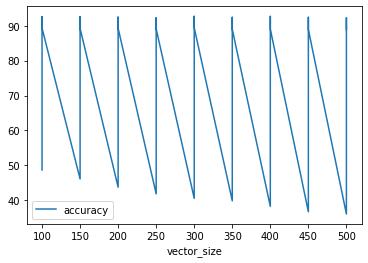

In [25]:
df.plot('vector_size', 'accuracy')

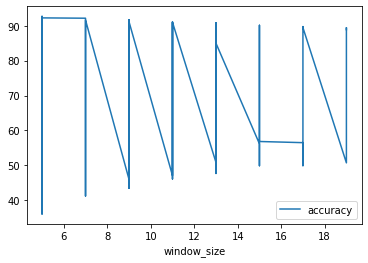

In [28]:
df.sort_values(by ='window_size').plot('window_size', 'accuracy')

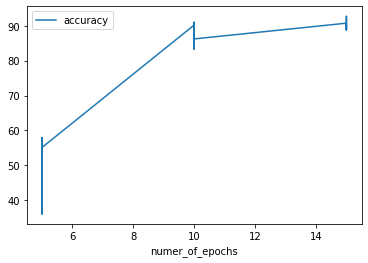

In [29]:
df.sort_values(by ='numer_of_epochs').plot('numer_of_epochs', 'accuracy')

In [ ]:
import matplotlib.pyplot as plt
plt.plot()